# Feature Matching (SIFT)
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2024-03-08

Reference: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

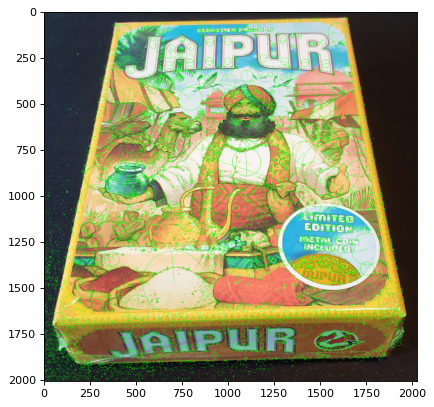

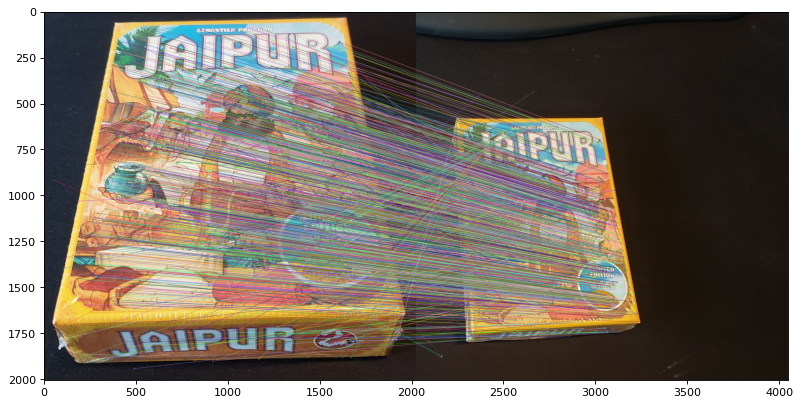

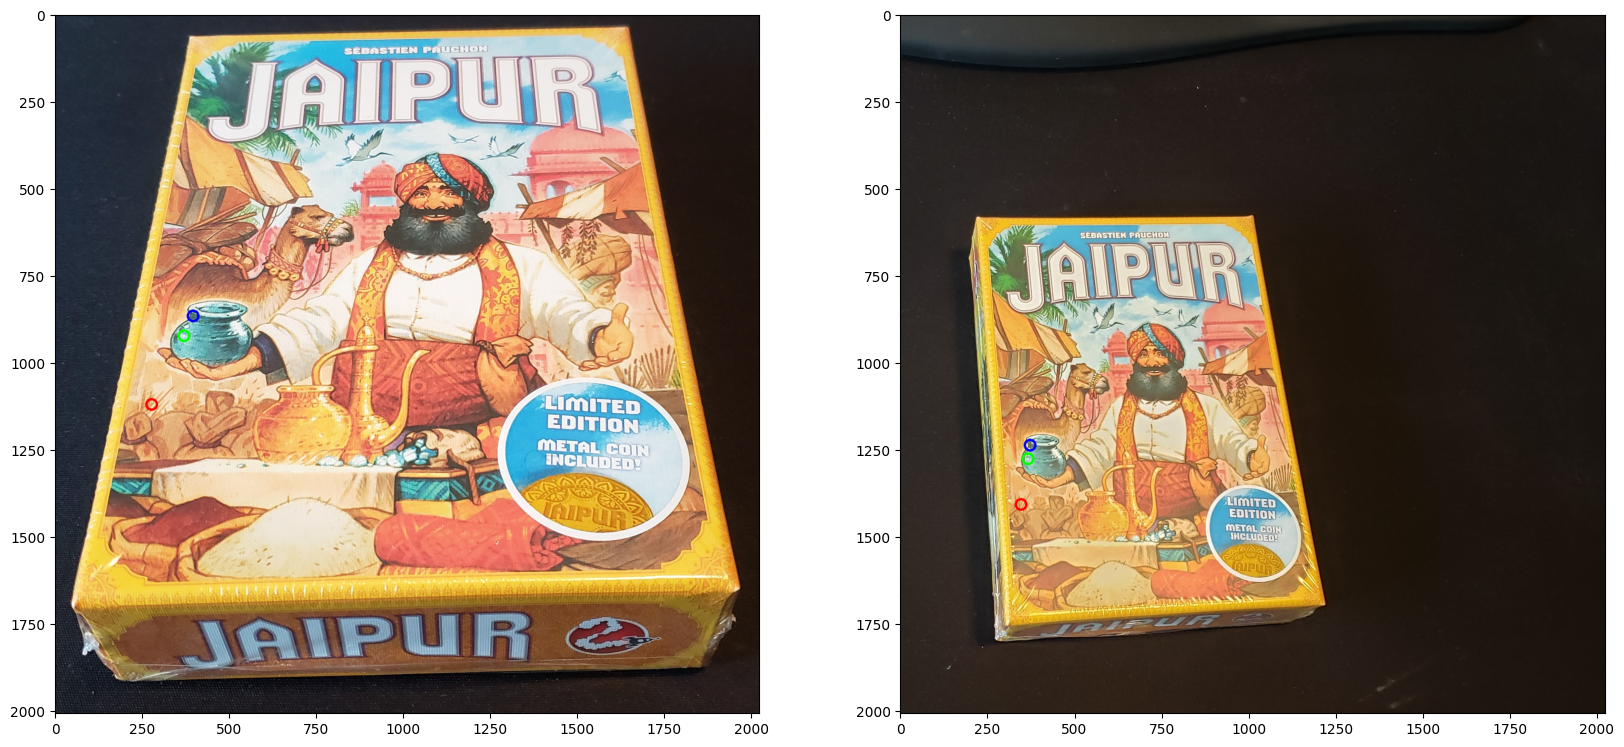

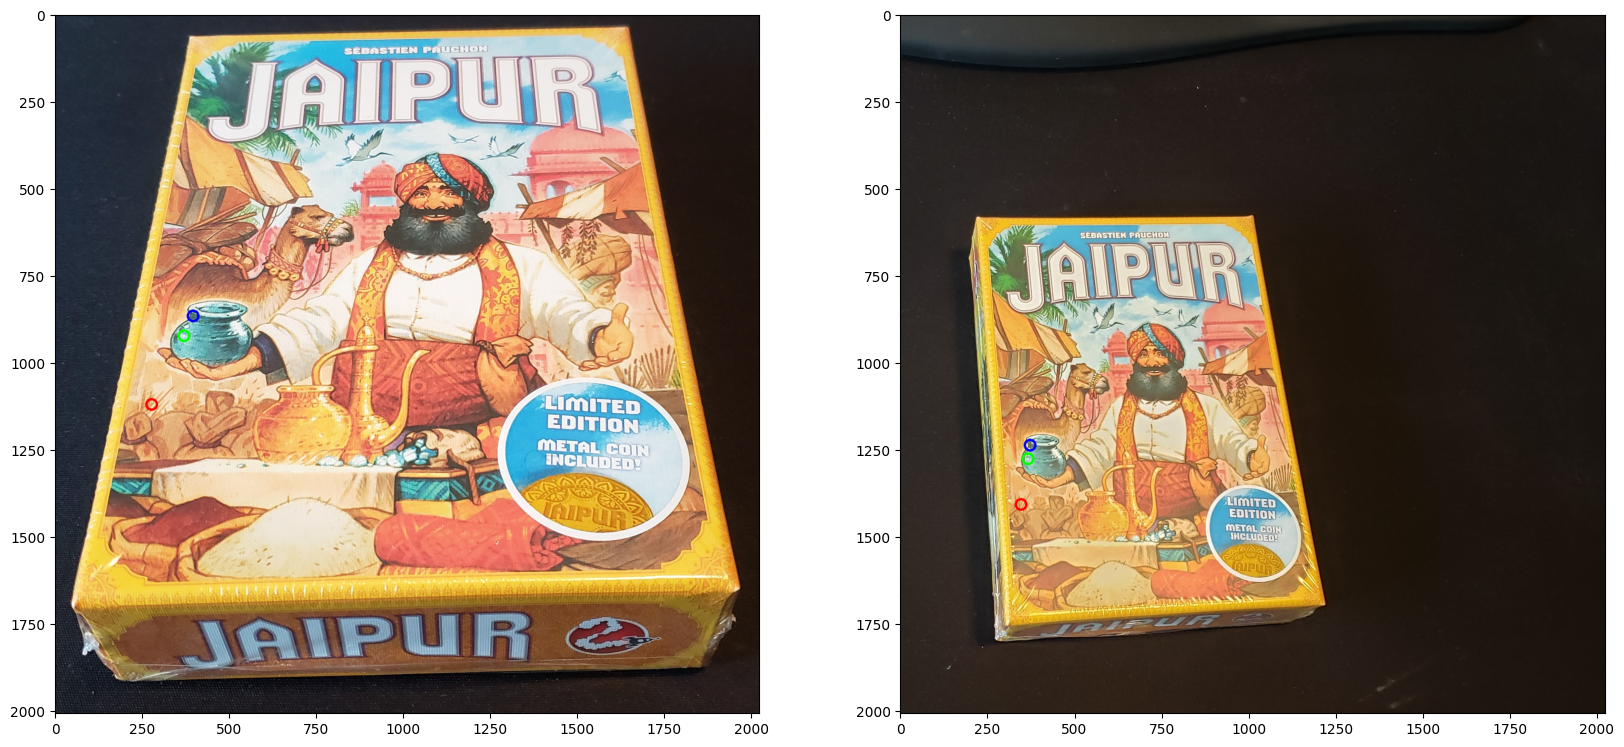

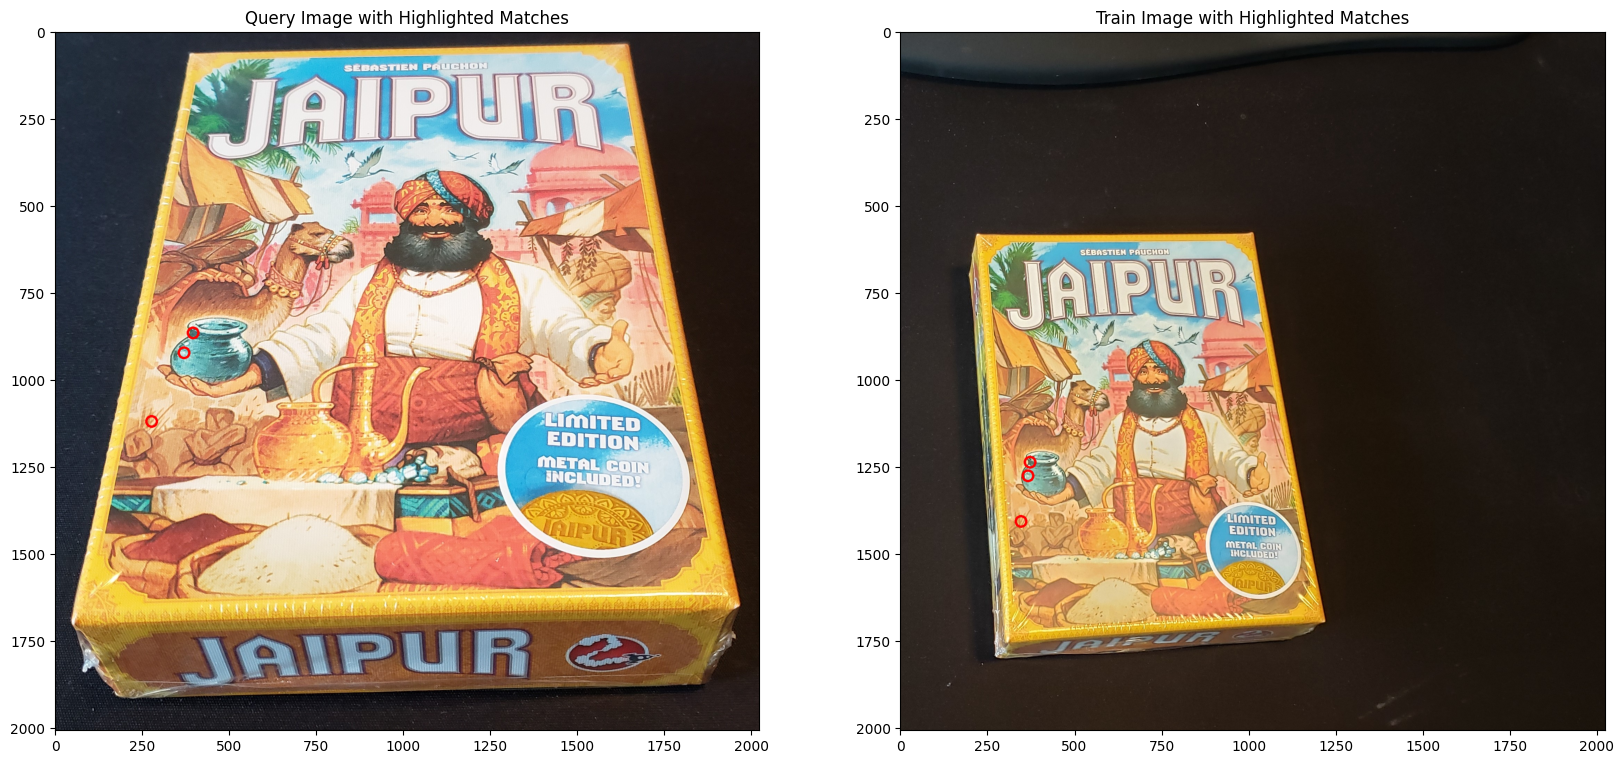

In [18]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load two images as queryImage and trainImage respectively
img1 = cv.imread('20201226_125213.jpg')  # Query image
img2 = cv.imread('20201226_125222.jpg')  # Train image

# Convert images to grayscale for feature detection
img1_GRAY = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_GRAY = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Convert images to RGB for visualization purposes
img1_RGB = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_RGB = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Initialize the SIFT (Scale-Invariant Feature Transform) feature detector
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors with SIFT for both images
kp1, des1 = sift.detectAndCompute(img1_GRAY, None)
kp2, des2 = sift.detectAndCompute(img2_GRAY, None)

# Initialize the Brute-Force Matcher with default parameters
bf = cv.BFMatcher()

# Perform k-nearest neighbor matching
matches = bf.knnMatch(des1, des2, k=2)

# Display keypoints on the first image using matplotlib
plt.figure(figsize=(12, 6), dpi=80)
kp_image = cv.drawKeypoints(img1_RGB, kp1, None, color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(kp_image)
plt.show()

# Filter matches using the Lowe's ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Draw the good matches on both images
# Note: cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1_RGB, kp1, img2_RGB, kp2, [[m] for m in good], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Visualize the matching keypoints
plt.figure(figsize=(12, 6), dpi=80)
plt.imshow(img3)
plt.show()

# METHOD 1
# Example of drawing circles around specific matched keypoints on both images
# Here, we select keypoints based on their indices in the 'good' list and draw circles around them.

# Draw circles for the match with index 50
pt1 = tuple(int(x) for x in kp1[good[50].queryIdx].pt)
pt2 = tuple(int(x) for x in kp2[good[50].trainIdx].pt)
img1_circle = cv.circle(img1_RGB.copy(), pt1, 15, (255, 0, 0), 5)
img2_circle = cv.circle(img2_RGB.copy(), pt2, 15, (255, 0, 0), 5)

# Repeat for other matches with different colors for visualization
# Match with index 100
pt1 = tuple(int(x) for x in kp1[good[100].queryIdx].pt)
pt2 = tuple(int(x) for x in kp2[good[100].trainIdx].pt)
img1_circle = cv.circle(img1_circle.copy(), pt1, 15, (0, 255, 0), 5)
img2_circle = cv.circle(img2_circle.copy(), pt2, 15, (0, 255, 0), 5)

# Match with index 130
pt1 = tuple(int(x) for x in kp1[good[130].queryIdx].pt)
pt2 = tuple(int(x) for x in kp2[good[130].trainIdx].pt)
img1_circle = cv.circle(img1_circle.copy(), pt1, 15, (0, 0, 255), 5)
img2_circle = cv.circle(img2_circle.copy(), pt2, 15, (0, 0, 255), 5)

# Visualize the images with circles drawn around the selected matches
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(img1_circle)
plt.subplot(122), plt.imshow(img2_circle)
plt.show()

# METHOD 2
points1 = ([kp1[m.queryIdx].pt for m in good])
points1 = ([(int(x), int(y)) for x, y in points1])

points2 = ([kp2[m.trainIdx].pt for m in good])
points2 = ([(int(x), int(y)) for x, y in points2])

img1_circle = cv.circle(img1_RGB.copy(), points1[50], 15, (255, 0, 0), 5)
img2_circle = cv.circle(img2_RGB.copy(), points2[50], 15, (255, 0, 0), 5)
img1_circle = cv.circle(img1_circle.copy(), points1[100], 15, (0, 255, 0), 5)
img2_circle = cv.circle(img2_circle.copy(), points2[100], 15, (0, 255, 0), 5)
img1_circle = cv.circle(img1_circle.copy(), points1[130], 15, (0, 0, 255), 5)
img2_circle = cv.circle(img2_circle.copy(), points2[130], 15, (0, 0, 255), 5)

# Visualize the images with circles drawn around the selected matches
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(img1_circle)
plt.subplot(122), plt.imshow(img2_circle)
plt.show()

# METHOD 3
# Example of drawing circles around specific matched keypoints on both images using METHOD 1
def draw_matched_keypoints(image1, image2, keypoints1, keypoints2, matches, indices):
    for index in indices:
        pt1 = tuple(int(x) for x in keypoints1[matches[index].queryIdx].pt)
        pt2 = tuple(int(x) for x in keypoints2[matches[index].trainIdx].pt)
        cv.circle(image1, pt1, 15, (255, 0, 0), 5)
        cv.circle(image2, pt2, 15, (255, 0, 0), 5)

# Preparing images for drawing
img1_with_circles = img1_RGB.copy()
img2_with_circles = img2_RGB.copy()

# Draw circles for selected matches
draw_matched_keypoints(img1_with_circles, img2_with_circles, kp1, kp2, good, [50, 100, 130])

# Visualize the images with circles drawn around the selected matches
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(img1_with_circles), plt.title("Query Image with Highlighted Matches")
plt.subplot(122), plt.imshow(img2_with_circles), plt.title("Train Image with Highlighted Matches")
plt.show()
